netcdf time 7936
dat file time 15023


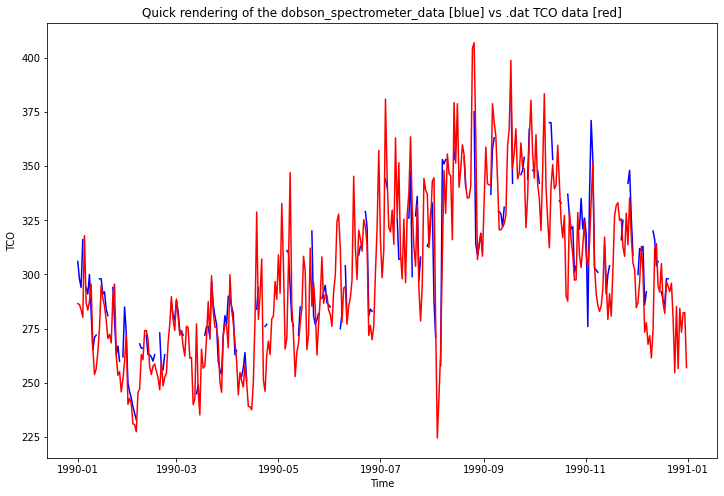

In [66]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

netcdf_path = r'/run/user/1000/gvfs/smb-share:server=erebus.local,share=storage/Scratch/Shaun/CheckTCO/GroundBasedTCO_stn0256.nc'

ds = xr.open_dataset(netcdf_path)
netcdf_time = ds['time'].values

dat_path = r'/run/user/1000/gvfs/smb-share:server=erebus.local,share=storage/Scratch/Shaun/CheckTCO/TCOForAlex.dat'

header = ['year', 'month', 'day', 'day_of_year', 'TCO', 'uncertainty']

df = pd.read_csv(dat_path, skiprows=8, names=header)
df

print('netcdf time', len(netcdf_time))
print('dat file time', len(df['year']))

arr = []
dates = []

dates_1990 = []
dat_TCO_1990 = []
spect_TCO_1990 = []

for i, date in enumerate(df['year']):
    curr_date = pd.to_datetime(f"{date}-{df['month'][i]}-{df['day'][i]}")
    curr_date = np.array(curr_date,dtype=np.datetime64)
    dates.append(curr_date)

    if date == 1990:
        try:
            dates_1990.append(curr_date)
            dat_TCO_1990.append(df['TCO'][i])
            netcdf_idx = np.where(netcdf_time.astype('datetime64[D]') == curr_date.astype('datetime64[D]'))
            spect_TCO_1990.append(ds['total_column_ozone'].values[netcdf_idx[0][0]])
        except:
            spect_TCO_1990.append(np.nan)

    if curr_date.astype('datetime64[D]') in netcdf_time.astype('datetime64[D]'):
        try:
            netcdf_idx = np.where(netcdf_time.astype('datetime64[D]') == curr_date.astype('datetime64[D]'))
            arr.append(ds['total_column_ozone'].values[netcdf_idx[0][0]])
        except:
            arr.append(np.nan)
    else:
        arr.append(np.nan)

df['dobson_spectrometer_data'] = arr

plt.figure(figsize=(12,8))
plt.title('Dobson_spectrometer_data [blue] vs .dat TCO data [red]')
plt.xlabel('Time')
plt.ylabel('TCO')
plt.plot(dates, arr, c='blue')
plt.plot(dates, df['TCO'], c='red')
plt.savefig(r'/home/shaun/Desktop/plot.jpeg', dpi=300)

plt.figure(figsize=(12,8))
plt.title('Dobson_spectrometer_data [blue] vs .dat TCO data [red], in 1990.')
plt.xlabel('Time')
plt.ylabel('TCO')
plt.plot(dates_1990, spect_TCO_1990, c='blue')
plt.plot(dates_1990, dat_TCO_1990, c='red')
plt.savefig(r'/home/shaun/Desktop/1990_plot.jpeg', dpi=300)

df.to_csv(r'/home/shaun/Desktop/out.dat', index=False)